## 评分卡模型构建

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

|  特征/标签   | 含义  |
|  :----  | :----  |
| SeriousDlqin2yrs  | 出现 90 天或更长时间的逾期行为（即定义好坏客户标签） |
| RevolvingUtilizationOfUnsecuredLines  | 贷款以及信用卡可用额度与总额度比例 |  
| age  | 借款人借款年龄 |  
| NumberOfTime30-59DaysPastDueNotWorse  | 过去两年内出现35-59天逾期但是没有发展得更坏的次数 |  
| DebtRatio  | 每月偿还债务，赡养费，生活费用除以月总收入 |  
| MonthlyIncome  | 月收入 |  
| NumberOfOpenCreditLinesAndLoans  | 开放式贷款和信贷数量 |  
| NumberOfTimes90DaysLate  | 过去两年内出现90天逾期或更坏的次数 |  
| NumberRealEstateLoansOrLines  | 抵押贷款和房地产贷款数量，包括房屋净值信贷额度 |  
| NumberOfTime60-89DaysPastDueNotWorse  | 过去两年内出现60-89天逾期但是没有发展得更坏的次数 |  
| NumberOfDependents  | 家庭中不包括自身的家属人数（配偶，子女等） |  

### 1.数据读取且初步分析

In [2]:
data=pd.read_csv('./rankingcard.csv',index_col=0)

In [3]:
#去除重复值
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [4]:
#查看缺失信息
null_info=pd.DataFrame({'num':pd.isnull(data).sum().values,'percent':pd.isnull(data).sum().values/data.shape[0]},index=data.columns.values)
null_info

,num,percent
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29221,0.195601
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


### 2.数据可视化，异常值与缺失值处理

In [5]:
data.describe([0.1,0.25,0.5,0.75,0.9,0.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.003199,33.000000,0.000000,0.034991,2.029000e+03,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.978007,72.000000,1.000000,1275.000000,1.166600e+04,15.000000,0.000000,2.000000,0.000000,2.000000
99%,1.000000,1.093922,87.000000,4.000000,4985.100000,2.500000e+04,24.000000,3.000000,4.000000,2.000000,4.000000


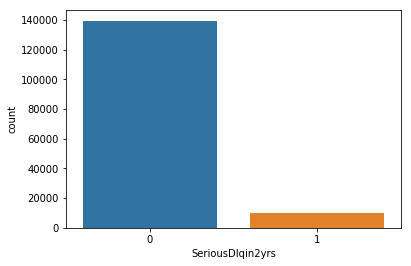

好客户数目： 139382
坏客户数目： 10009
好坏比例： 13.925666899790189


In [6]:
# SeriousDlqin2yrs特征 好坏客户分布

sns.countplot(x='SeriousDlqin2yrs',data=data)
plt.show()

data_good=len(data[data['SeriousDlqin2yrs']==0])
data_bad=len(data[data['SeriousDlqin2yrs']==1])
print('好客户数目：',data_good)
print('坏客户数目：',data_bad)
print('好坏比例：',data_good/data_bad)

#样本极不平衡 好客户数目远大于坏客户数目

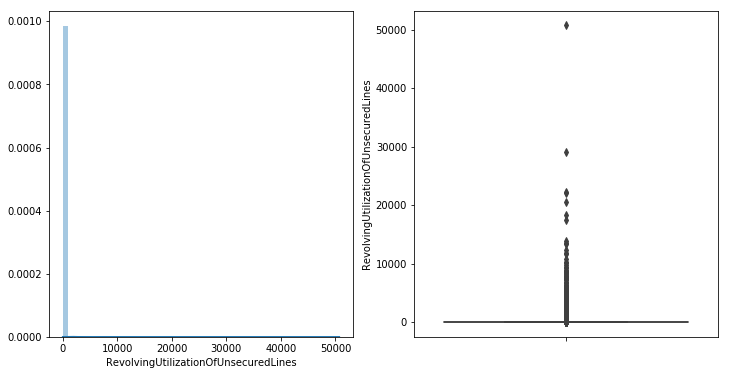

In [7]:
# RevolvingUtilizationOfUnsecuredLines特征 可用额度比值
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['RevolvingUtilizationOfUnsecuredLines'],ax=ax1)
sns.boxplot(y='RevolvingUtilizationOfUnsecuredLines',data=data,ax=ax2)
plt.show()


In [8]:
data[data['RevolvingUtilizationOfUnsecuredLines']>1].shape[0]

# 大部分点都是不大于1的，多于1的仅有3321例异常点，直接删除
# 可用额度与总额度比值大于1就离谱

3321

In [9]:
data=data[data['RevolvingUtilizationOfUnsecuredLines']<=1]
data.reset_index(drop=True,inplace=True)

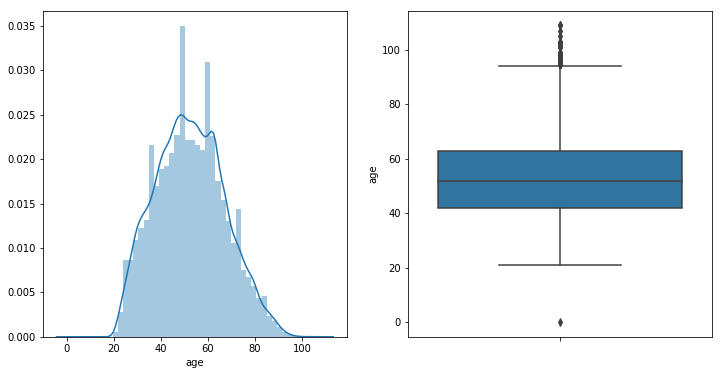

In [10]:
# age特征
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['age'],ax=ax1)
sns.boxplot(y='age',data=data,ax=ax2)
plt.show()


In [11]:
# 高于100岁可以理解，而且高于100的数值分布比较连续
data[data['age']>100].shape[0]

13

In [12]:
data[data['age']<18].shape[0]
# 可见那个异常值是0岁，这个年龄办信用卡就离谱，直接删除

1

In [13]:
data=data[data['age']>=18]
data.reset_index(drop=True,inplace=True)

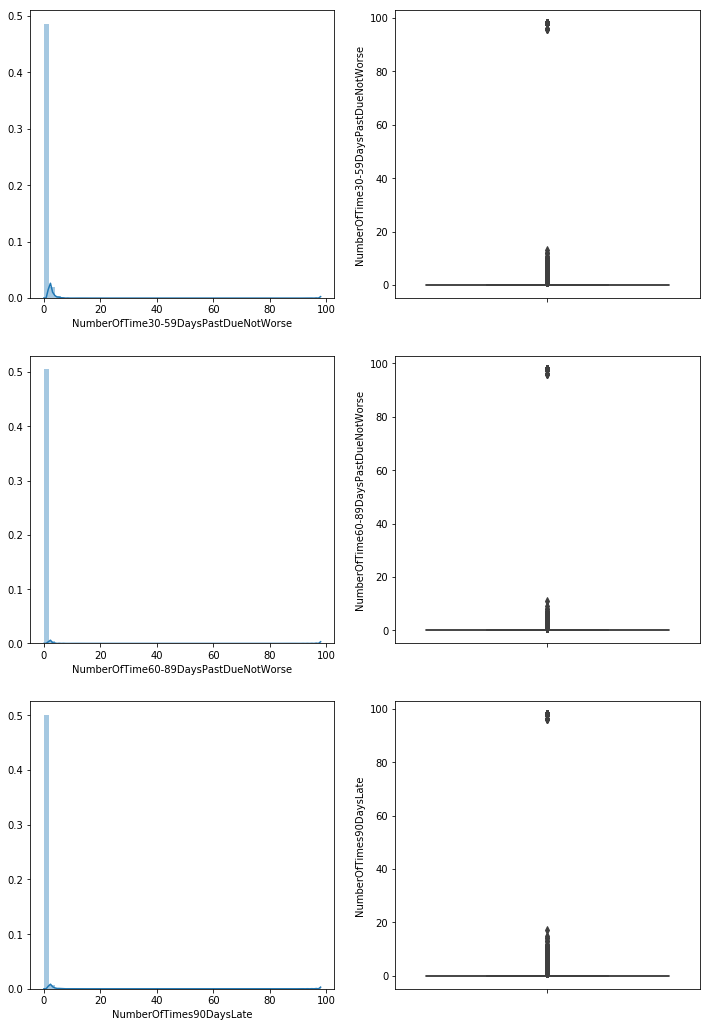

In [14]:
# NumberOfTime30-59DaysPastDueNotWorse
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfTimes90DaysLate

fig,[[ax1,ax2],[ax3,ax4],[ax5,ax6]]=plt.subplots(3,2,figsize=(12,18))
sns.distplot(data['NumberOfTime30-59DaysPastDueNotWorse'],ax=ax1)
sns.boxplot(y='NumberOfTime30-59DaysPastDueNotWorse',data=data,ax=ax2)
sns.distplot(data['NumberOfTime60-89DaysPastDueNotWorse'],ax=ax3)
sns.boxplot(y='NumberOfTime60-89DaysPastDueNotWorse',data=data,ax=ax4)
sns.distplot(data['NumberOfTimes90DaysLate'],ax=ax5)
sns.boxplot(y='NumberOfTimes90DaysLate',data=data,ax=ax6)
plt.show()

In [15]:
# 去除超过80的明显的异常值 两年内逾期次数将近100次就很夸张
data=data[(data['NumberOfTime30-59DaysPastDueNotWorse']<80)
    |(data['NumberOfTime60-89DaysPastDueNotWorse']<80)
    |(data['NumberOfTimes90DaysLate']<80)]

data.reset_index(drop=True,inplace=True)

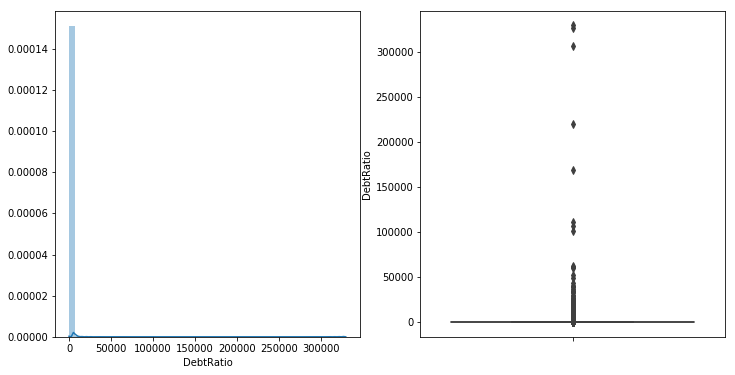

In [16]:
# DebtRatio负债率
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['DebtRatio'],ax=ax1)
sns.boxplot(y='DebtRatio',data=data,ax=ax2)
plt.show()

In [17]:
data[data['DebtRatio']>1].shape[0]
# 负债率为每月偿还债务，赡养费，生活费用除以月总收入。负债率大于1很有可能，偿还的债务大于自己的收入。
# 并且负债率大于1的样本数将近4w，猜测不是异常值

34382

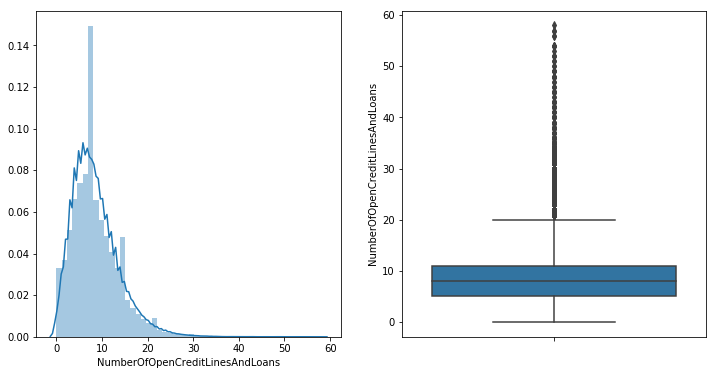

In [18]:
# NumberOfOpenCreditLinesAndLoans信贷数目
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['NumberOfOpenCreditLinesAndLoans'],ax=ax1)
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans',data=data,ax=ax2)
plt.show()

#上界比较连续，猜测可能不是异常值

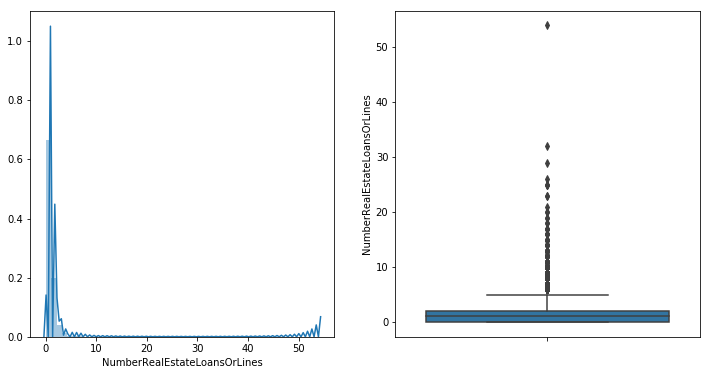

In [19]:
# NumberRealEstateLoansOrLines 固定资产贷款数目
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['NumberRealEstateLoansOrLines'],ax=ax1)
sns.boxplot(y='NumberRealEstateLoansOrLines',data=data,ax=ax2)
plt.show()

In [20]:
# 删除大于50的那个异常值
data=data[data['NumberRealEstateLoansOrLines']<50]
data.reset_index(drop=True,inplace=True)

In [21]:
# NumberOfDependents 家属数目 
# MonthlyIncome 月收入
# 该两特征都包含缺失值，故先处理缺失值，再进行异常值处理
null_info=pd.DataFrame({'num':pd.isnull(data).sum().values,'percent':pd.isnull(data).sum().values/data.shape[0]},index=data.columns.values)
null_info

,num,percent
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,28593,0.196053
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [22]:
# NumberOfDependents 缺失值比较少，直接删除
data=data[data['NumberOfDependents'].notnull()]
data.reset_index(drop=True,inplace=True)

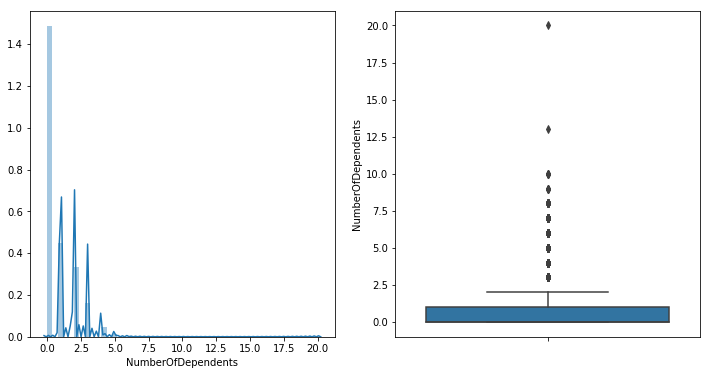

In [23]:
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['NumberOfDependents'],ax=ax1)
sns.boxplot(y='NumberOfDependents',data=data,ax=ax2)
plt.show()

# 其实我觉得家属数目差距不大，即使是看似是异常值的20，所以在此处不做处理

In [24]:
# MonthlyIncome 月收入 缺失值较多，此处采用RF回归模型进行填充
to_fill_column='MonthlyIncome'
fill_x=data.loc[:,data.columns!=to_fill_column]
fill_y=data.loc[:,to_fill_column]
fill_y_train=fill_y.loc[fill_y.notnull()]
fill_y_test=fill_y.loc[fill_y.isnull()]
fill_x_train=fill_x.loc[fill_y.notnull(),:]
fill_x_test=fill_x.loc[fill_y.isnull(),:]

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(fill_x_train,fill_y_train)
fill_y_pred=rf.predict(fill_x_test)
data.loc[fill_y.isnull(),to_fill_column]=fill_y_pred

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142093 entries, 0 to 142092
Data columns (total 11 columns):
SeriousDlqin2yrs                        142093 non-null int64
RevolvingUtilizationOfUnsecuredLines    142093 non-null float64
age                                     142093 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    142093 non-null int64
DebtRatio                               142093 non-null float64
MonthlyIncome                           142093 non-null float64
NumberOfOpenCreditLinesAndLoans         142093 non-null int64
NumberOfTimes90DaysLate                 142093 non-null int64
NumberRealEstateLoansOrLines            142093 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    142093 non-null int64
NumberOfDependents                      142093 non-null float64
dtypes: float64(4), int64(7)
memory usage: 11.9 MB


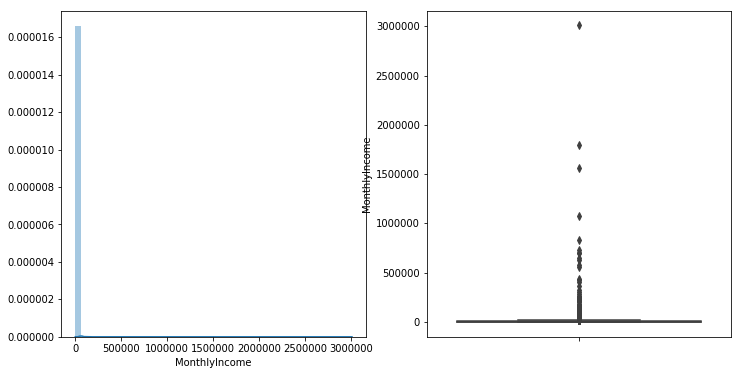

In [25]:
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
sns.distplot(data['MonthlyIncome'],ax=ax1)
sns.boxplot(y='MonthlyIncome',data=data,ax=ax2)
plt.show()

# 月收入这个不好猜测，毕竟有少数人挣得很多，此处不做异常值处理

### 3.数据采样


In [26]:
data_good=len(data[data['SeriousDlqin2yrs']==0])
data_bad=len(data[data['SeriousDlqin2yrs']==1])
print('好客户数目：',data_good)
print('坏客户数目：',data_bad)
print('好坏比例：',data_good/data_bad)
# 经过处理后的数据类别仍不均衡

好客户数目： 133601
坏客户数目： 8492
好坏比例： 15.732571832312765


In [27]:
# 划分数据集后，对训练集采用上采样方法
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x=data.iloc[:,1:]
y=data.iloc[:,0]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,stratify=y,random_state=78)

sm=SMOTE(random_state=78)
train_x,train_y=sm.fit_sample(train_x,train_y)

train_y.value_counts()
# 可以发现样本被扩充至正负样本一致

1    93521
0    93521
Name: SeriousDlqin2yrs, dtype: int64

### 4.特征分箱

In [28]:
# 计算woe
def get_woe(num_bins):
    columns=['min','max','good_num','bad_num']
    df_bins=pd.DataFrame(num_bins,columns=columns)
    df_bins['total']=df_bins['good_num']+df_bins['bad_num']
    df_bins['percent']=df_bins['total']/df_bins['total'].sum()
    df_bins['bad_percent']=df_bins['bad_num']/df_bins['total']
    df_bins['good_rate']=df_bins['good_num']/df_bins['good_num'].sum()
    df_bins['bad_rate']=df_bins['bad_num']/df_bins['bad_num'].sum()
    df_bins['woe']=np.log(df_bins['good_rate']/df_bins['bad_rate'])
    return df_bins

#计算iv
def get_iv(df_bins):
    rate=df_bins['good_rate']-df_bins['bad_rate']
    iv=np.sum(rate*df_bins['woe'])
    return iv

import scipy.stats
# 计算分箱结果并可视化分箱数与iv之间的关系
def graphforbestbin(df,x,y,q=20,n=1,graph=True):
    '''
    :param df: 原始数据，包含特征列与标签列 
    :param x: 某特征列名称
    :param y: 标签列名称
    :param q: 初始分箱个数
    :param n: 保留分箱个数
    :param graph: 是否绘制图像
    :return: 分箱结果
    '''
    
    df_cut=df[[x,y]].copy()
    df_cut['qcut'],bins=pd.qcut(df_cut[x],q=q,retbins=True,duplicates='drop')
    # 统计不同分箱中好坏客户的数目
    count_y0=df_cut[df_cut[y]==0].groupby(by='qcut').count()[y]
    count_y1=df_cut[df_cut[y]==1].groupby(by='qcut').count()[y]
    num_bins=[*zip(bins,bins[1:],count_y0,count_y1)]
    # num_bins中每个元素前两个是分箱边界，后两个分别是该分箱中好坏客户分布
    
    # 保证每个分箱中都含有正负样本
    for i in range(q):
        # 检查第一个分箱，若仅有正样本或者负样本，则将其与第二个分箱合并
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3]
            )]
            continue
        
        # for......else......的执行顺序为：
        #当迭代对象完成所有迭代后且此时的迭代对象为空时，如果存在else子句则执行else子句，没有则继续执行后续代码；
        # 如果迭代对象因为某种原因（如带有break关键字）提前退出迭代，则else子句不会被执行，程序将会直接跳过else子句继续执行后续代码
        for j in range(len(num_bins)):
            # 检查当前分箱，若仅有正样本或者负样本，则将其与上个分箱合并
            if 0 in num_bins[j][2:]:
                num_bins[j-1:j+1]=[(
                    num_bins[j-1][0],
                    num_bins[j][1],
                    num_bins[j-1][2]+num_bins[j][2],
                    num_bins[j-1][3]+num_bins[j][3]
                )]
                break
        else: # 遍历完所有分箱，且都满足含有正负样本，则提前跳出大循环
            break

    # 不断合箱，得到不同分箱数对应的iv值    
    ivs=[] # 记录iv值
    cuts=[] # 记录箱数
    while len(num_bins)>n:
        # 相邻两个分箱计算好坏用户之间的卡方距离，合并距离最近的两个分箱
        # 此处记录p值，卡方距离越小，p值越大，故合并p值最大的两个分箱
        pvals=[]
        for i in range(len(num_bins)-1):
            x1=num_bins[i][2:]
            x2=num_bins[i+1][2:]
            p=scipy.stats.chi2_contingency([x1,x2])[1]
            pvals.append(p)
        
        maxp_ind=np.argmax(pvals)
        num_bins[maxp_ind:maxp_ind+2]=[(
            num_bins[maxp_ind][0],
            num_bins[maxp_ind+1][1],
            num_bins[maxp_ind][2]+num_bins[maxp_ind+1][2],
            num_bins[maxp_ind][3]+num_bins[maxp_ind+1][3]
        )]
        
        df_bins=get_woe(num_bins)
        cuts.append(len(num_bins))
        ivs.append(get_iv(df_bins))
        
    if graph:
        plt.figure()
        plt.plot(cuts,ivs)
        plt.xticks(cuts)
        plt.xlabel('num of boxes')
        plt.ylabel('iv')
        plt.title(x)
        plt.show()
    return df_bins
            

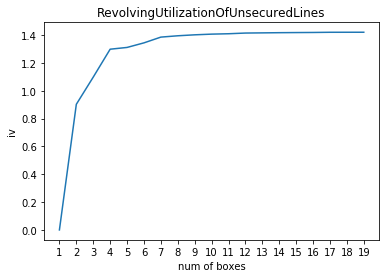

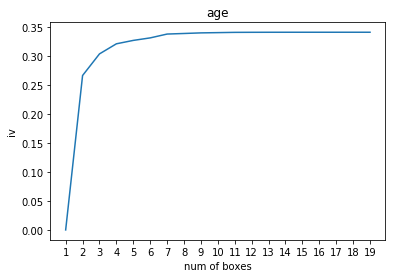

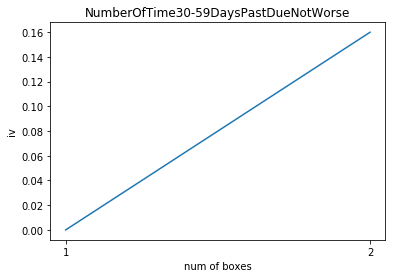

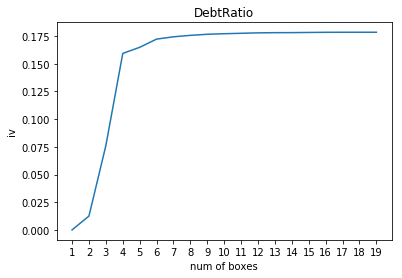

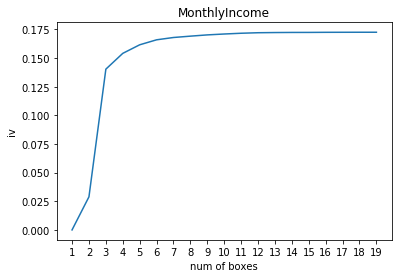

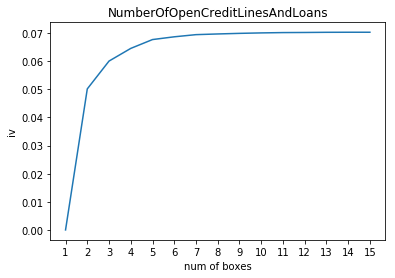

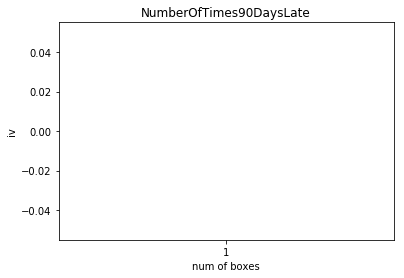

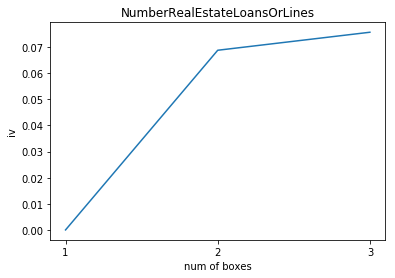

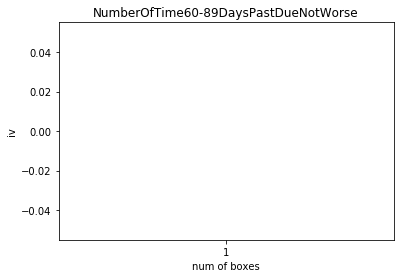

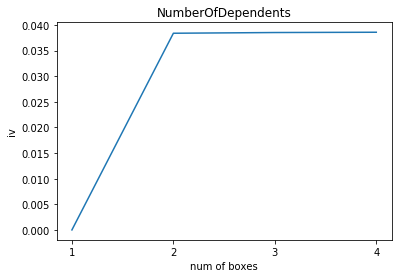

In [29]:
train_data=pd.concat([train_y,train_x],axis=1)
for i in train_data.columns.values[1:]:
    graphforbestbin(train_data,i,'SeriousDlqin2yrs',q=20,n=1,graph=True)

可以发现某些特征是空白图或者曲线点很少，是因为其可分箱数本来就较少，这部分特征可以手动指定箱数。
***对于其他特征，选择明显转折点对应的分箱数进行分箱。***

In [30]:
#希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好
graphforbestbin(train_data,'MonthlyIncome','SeriousDlqin2yrs',q=20,n=4,graph=False)        


,min,max,good_num,bad_num,total,percent,bad_percent,good_rate,bad_rate,woe
0,0.000000,1.161235e-01,7576,1777,9353,0.050005,0.189993,0.081009,0.019001,1.450059
1,0.116124,3.983618e-01,5347,4005,9352,0.049999,0.428251,0.057174,0.042825,0.288992
2,0.398362,6.300000e+03,48921,63328,112249,0.600127,0.564174,0.523102,0.677153,-0.258121
3,6300.000000,3.008750e+06,31677,24411,56088,0.299868,0.435227,0.338715,0.261022,0.260557


In [31]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":7,
                "age":6,
                "DebtRatio":5,
                "MonthlyIncome":5,
                "NumberOfOpenCreditLinesAndLoans":6}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,4,12]
            ,"NumberOfTimes90DaysLate":[0,1,2,4,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,32]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,4,11]
            ,"NumberOfDependents":[0,1,2,4,20]}
# 最小值用-inf替代，最大值用inf替代
hand_bins={k:[-np.inf,*v[:-1],np.inf]for k,v in hand_bins.items()}

#得到全部特征及其对应分箱结果
bins_of_cols={}
for col,n in auto_col_bins.items():
    df_bins=graphforbestbin(train_data,col,'SeriousDlqin2yrs',q=20,n=n,graph=False)
    bins=sorted(set(df_bins["min"]).union(df_bins["max"]))
    bins[0],bins[-1]=-np.inf,np.inf
    bins_of_cols[col]=bins
bins_of_cols.update(hand_bins)

bins_of_cols

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.03316125275000001,
  0.0942678045,
  0.27403310760000005,
  0.42412493831919246,
  0.7318750009984306,
  0.976915794824927,
  inf],
 'age': [-inf, 37.0, 52.0, 56.0, 61.0, 67.0, inf],
 'DebtRatio': [-inf,
  0.017734516350000003,
  0.3563206239334996,
  1.1008374246854162,
  848.0,
  inf],
 'MonthlyIncome': [-inf,
  0.11612351232779519,
  0.39836182183187463,
  4800.0,
  6300.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 8.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, 4, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, 4, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, 4, inf]}

### 5.woe映射

In [32]:
#根据分箱得到对应的woe值
def get_woe_bins(df,col,y,bins):
    df_=df[[col,y]].copy()
    df_['cuts']=pd.cut(df_[col],bins)
    df_cuts=df_.groupby('cuts')[y].value_counts().unstack()
    woe=df_cuts['woe']=np.log((df_cuts[0]/df_cuts[0].sum())/(df_cuts[1]/df_cuts[1].sum()))
    return woe

woeall={}
for col,bins in bins_of_cols.items():
    woeall[col]=get_woe_bins(train_data,col,'SeriousDlqin2yrs',bins)

woeall

{'RevolvingUtilizationOfUnsecuredLines': cuts
 (-inf, 0.0332]      2.443587
 (0.0332, 0.0943]    1.621936
 (0.0943, 0.274]     0.598359
 (0.274, 0.424]     -0.162676
 (0.424, 0.732]     -0.803431
 (0.732, 0.977]     -1.379225
 (0.977, inf]       -0.678508
 dtype: float64, 'age': cuts
 (-inf, 37.0]   -0.477952
 (37.0, 52.0]   -0.301677
 (52.0, 56.0]   -0.038576
 (56.0, 61.0]    0.306172
 (61.0, 67.0]    0.839209
 (67.0, inf]     1.448955
 dtype: float64, 'DebtRatio': cuts
 (-inf, 0.0177]     1.572807
 (0.0177, 0.356]    0.092399
 (0.356, 1.101]    -0.364359
 (1.101, 848.0]    -0.098412
 (848.0, inf]       0.337224
 dtype: float64, 'MonthlyIncome': cuts
 (-inf, 0.116]       1.450059
 (0.116, 0.398]      0.288992
 (0.398, 4800.0]    -0.322549
 (4800.0, 6300.0]   -0.064259
 (6300.0, inf]       0.260557
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cuts
 (-inf, 1.0]   -0.860088
 (1.0, 3.0]    -0.339171
 (3.0, 5.0]    -0.039465
 (5.0, 8.0]     0.164452
 (8.0, 17.0]    0.083100
 (17.0, 

In [33]:
# 将woeall中统计的各特征的各分箱的woe映射到对应的分箱结果上
train_woe=pd.DataFrame(index=train_data.index)
for col,bins in bins_of_cols.items():
    train_woe[col]=pd.cut(train_data[col],bins).map(woeall[col])
train_woe['SeriousDlqin2yrs']=train_data['SeriousDlqin2yrs']

test_data=pd.concat([test_x,test_y],axis=1)
test_woe=pd.DataFrame(index=test_data.index)
for col,bins in bins_of_cols.items():
    test_woe[col]=pd.cut(test_data[col],bins).map(woeall[col])
test_woe['SeriousDlqin2yrs']=test_data['SeriousDlqin2yrs']

### 6.模型训练

In [34]:
train_woe_x=train_woe.iloc[:,:-1]
train_woe_y=train_woe.iloc[:,-1]

test_woe_x=test_woe.iloc[:,:-1]
test_woe_y=test_woe.iloc[:,-1]

from sklearn.linear_model import LogisticRegression as LR
clf=LR()
clf.fit(train_woe_x,train_woe_y)
clf.score(test_woe_x,test_woe_y)

0.7516186544055551

In [35]:
# 网格搜索最优参数
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(clf,param_grid={'C':[0.01,0.1,0.5,1,5,10]},scoring='accuracy',cv=5)
gs.fit(train_woe_x,train_woe_y)
print(gs.best_score_)
print(gs.best_params_)

0.7760556824052143
{'C': 0.1}


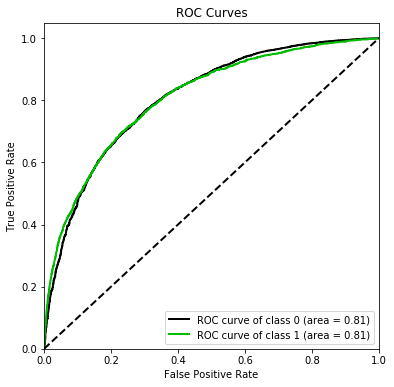

In [36]:
import scikitplot as skplt
 # 绘制roc曲线
clf=gs.best_estimator_
vali_proba_df = pd.DataFrame(clf.predict_proba(test_woe_x))
skplt.metrics.plot_roc(test_woe_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

### 7.评分卡制作

In [37]:
file = "./ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
base_score = A - B*clf.intercept_#lr.intercept_：截距
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(train_woe_x.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*clf.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

